In [71]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [72]:
# 计算欧式距离，即两点间的直线距离 
#参数：vector1-List列表，n维属性坐标值构成的向量
#      vector2-List列表，n维属性坐标值构成的向量
#返回值：浮点数，欧式距离

def euclDistance(vector1, vector2):  
    return np.sqrt(np.sum(np.power(vector2 - vector1, 2)))  

In [73]:
# 创建一个数据集，包含2个类别共8个样本
def createDataSet():
# 生成一个矩阵，每行表示一个样本
    group = np.array([[1.0,0.9], [1.0,1.0], [0.8,0.9], [0.6,0.65],
    [0.1, 0.2], [0.3,0.4], [0.2,0.3], [0.0, 0.1]])
# 监督学习，手工设置8个样本所属的类别标签
    labels = ['A', 'A','A', 'A', 'B', 'B','B', 'B']
    return group, labels

In [74]:
# KNN分类算法函数实现
#参数：newInput-List列表，待分类的数据点
#      dataSet-List列表，已分类点坐标
#      lables-List列表，分类标签
#      k-整数，近邻数量
#返回值：maxIndex-字符，分类结果
def kNNClassify(newInput, dataSet, labels, k):
    numSamples = dataSet.shape[0]   # shape[0]表示行数
    distance = []
#计算newInput与dataSet中个点的距离，放入distance列表内
    for vec in dataSet:
        distance.append(euclDistance(newInput,vec))        
#对距离排序
    sortedDistIndices = np.argsort(distance)
    classCount = {}
#选择k个最近邻
    for i in range(k):
        voteLabel = labels[sortedDistIndices[i]]
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1
    maxCount = 0
    for key, value in classCount.items():
        if value > maxCount:
            maxCount = value
            maxIndex = key
    return maxIndex

In [75]:
# 生成数据集和类别标签
dataSet, labels = createDataSet()
#K取值3，调用K近邻分类算法
k = 3
#对testX进行分类
testX = np.array([1.2, 1.0])
outputLabel = kNNClassify(testX, dataSet, labels, 3)
print( "Your input is:", testX, "and classified to class: ", outputLabel)
#对testY进行分类
testY = np.array([0.1, 0.3])
outputLabel = kNNClassify(testY, dataSet, labels, 3)
print("Your input is:", testY, "and classified to class: ", outputLabel)

Your input is: [1.2 1. ] and classified to class:  A
Your input is: [0.1 0.3] and classified to class:  B


In [76]:
# 随机生成聚类中心点  
#参数：dataSet-List列表，已分类点坐标
#      k-整数，近邻数量
#返回值：centroids-2维列表，k个随机中心点坐标
def initCentroids(dataSet, k):  
    numSamples, dim = dataSet.shape  
    centroids = np.zeros((k, dim))  
    for i in range(k):  
        index = int(np.random.uniform(0, numSamples))  
        centroids[i, :] = dataSet[index, :]  
    return centroids

In [77]:
# K均值聚类
#参数：dataSet-List列表，待聚类样本集
#      k-整数，近邻数量
#返回值：centroids-2维列表，k个随机中心点坐标
#        clusterAssment -列表，各个样本点的聚类结果
def kmeans(dataSet, k):  
    numSamples = dataSet.shape[0]
#第一列数据存放归属的点
#第二列存放样本与候选聚类中心点之间的误差  
    clusterAssment = np.mat(np.zeros((numSamples, 2)))  
    clusterChanged = True    
    centroids = initCentroids(dataSet, k)  
  
    while clusterChanged:  
        clusterChanged = False  
        for i in range(numSamples):  
            minDist  = 100000.0  
            minIndex = 0  
#依次找出最近候选聚类中心点
            for j in range(k):  
                distance = euclDistance(centroids[j, :], dataSet[i, :])  
                if distance < minDist:  
                    minDist  = distance  
                    minIndex = j  
#更新归属结果
            if clusterAssment[i, 0] != minIndex:  
                clusterChanged = True  
                clusterAssment[i, :] = minIndex, minDist**2  
#更新候选聚类中心点坐标
        for j in range(k):  
            pointsInCluster = dataSet[np.nonzero(clusterAssment[:, 0].A == j)[0]]  
            centroids[j, :] = np.mean(pointsInCluster, axis = 0)  
  
    print('KMN聚类完成!')  
    return centroids, clusterAssment  

In [78]:
# 2维平面显示聚类结果
#参数：dataSet-List列表，样本集
#      k-整数，近邻数量
#      centroids-List列表，聚类中心点坐标
#      clusterAssment-List列表，聚类结果
#返回值：无
def showCluster(dataSet, k, centroids, clusterAssment):  
    fig_2d_clustered=plt.figure()
    ax2d_clustered=fig_2d_clustered.add_subplot(111) 
    
    numSamples, dim = dataSet.shape  
    if dim != 2:  
        print("只能绘制2维图形")  
        return 1  
#创建数据点标记格式控制列表，实现数据点区别输出
    mark = ['.r', '+b', '*g', '1k', '^r', 'vr', 'sr', 'dr', '<r', 'pr']  
    if k > len(mark):  
        print("K值过大！")  
        return 1  
#绘制所有样本点
    for i in range(numSamples):  
        markIndex = int(clusterAssment[i, 0])  
        ax2d_clustered.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])  

#绘制聚类中心点  
    for i in range(k):
        ax2d_clustered.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 20)  
 
    fig_2d_clustered.savefig('clusterRes.png', dpi=300, bbox_inches='tight')
    fig_2d_clustered.show()

step 1: 读入数据：
原始数据分布：


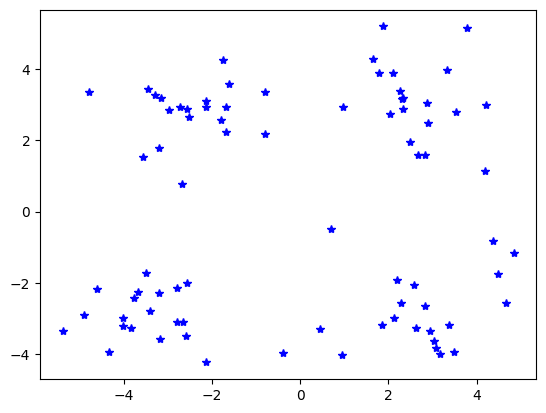

In [79]:
#调用以上函数，对读入数据进行聚类
print("step 1: 读入数据：")  
dataSetKMN = []  
fileIn = open('ch11 testSet.txt')  
for line in fileIn.readlines():  
    lineArr = line.strip().split(' ')  
    dataSetKMN.append([float(lineArr[0]), float(lineArr[1])])  
dataSetKMNSize = len(dataSetKMN)
dataSetKMN = np.mat(dataSetKMN)
for i in range(dataSetKMNSize):
    plt.plot(dataSetKMN[i, 0], dataSetKMN[i, 1],'b*') 
print("原始数据分布：") 
plt.savefig('ch12_kmn_orig.png', dpi=300, bbox_inches='tight')
plt.show()

In [80]:
#K取值4，调用K均值算法聚类
print("step 2: 聚类")    
k = 4
centroids, clusterAssment = kmeans(dataSetKMN, k) 

step 2: 聚类
KMN聚类完成!


step 3: 结果输出：


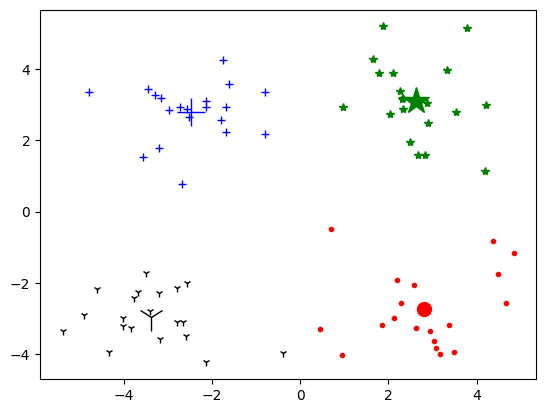

In [81]:
print("step 3: 结果输出：")  
showCluster(dataSetKMN, k, centroids, clusterAssment)

In [82]:
#计算代价TC
#参数：dataSet-List列表，样本集
#      k-整数，近邻数量
#      medoids_idx-List列表，候选中心点
#      clusterAssment-List列表，聚类结果
#返回值：total_cost-浮点数，TC代价
#        medoids-List2维列表，本次归属到各中心点的样本点
def totalcost(dataSet, medoids_idx) :
    distances_cache = {}
    size = len(dataSet)
    total_cost = 0.0
    medoids = {}
    for idx in medoids_idx :
        medoids[idx] = []
    for i in range(size) :
        choice = None
        min_cost = 100000
#计算各样本数据点到medoids_idx的距离，将其归属到距离最近的那个中心点
        for m in medoids :
            tmp = distances_cache.get((m,i),None)
            if tmp == None :
                tmp = euclDistance(dataSet[m],dataSet[i])
                distances_cache[(m,i)] = tmp
            if tmp < min_cost :
                choice = m
                min_cost = tmp
        medoids[choice].append(i)
        total_cost += min_cost
    return total_cost, medoids

In [83]:
# K中心点聚类
#参数：dataSet-List列表，待聚类样本集
#      k-整数，近邻数量
#返回值：centroids-2维列表，k个随机中心点坐标
#        clusterAssment -列表，各个样本点的聚类结果

import random

def kmedoids(dataSet, k) :
    size ,dim= dataSet.shape
    centroids = np.zeros((k,dim))
    clusterAssment = np.mat(np.zeros((size, 2)))    
    medoids_idx = random.sample([i for i in range(size)], k)
    pre_cost, medoids = totalcost(dataSet,medoids_idx)
    current_cost = 100000    
    best_choice = []
    best_res = {}
    iter_count = 0
#反复计算TC，进行聚类
    while 1 :
        for m in medoids :
            for item in medoids[m] :
                if item != m :
                    idx = medoids_idx.index(m)
                    swap_temp = medoids_idx[idx]
                    medoids_idx[idx] = item
                    tmp,medoids_ = totalcost(dataSet,medoids_idx)
                    if tmp < current_cost :
                        best_choice = list(medoids_idx)
                        best_res = dict(medoids_)
                        current_cost = tmp
                    medoids_idx[idx] = swap_temp
        iter_count += 1
        if best_choice == medoids_idx : break
        if current_cost <= pre_cost :
            pre_cost = current_cost
            medoids = best_res
            medoids_idx = best_choice
    
    centNum=0;
    for index in best_choice:
        centroids[centNum,:]=dataSet[index,:]
        centNum += 1
    
    classNumber = 0
    for key in best_res:
        for index in best_res[key]:
            clusterAssment[index,0]=classNumber
        classNumber += 1
      
    print('KMed聚类完成!')  
    return centroids, clusterAssment

K中心点算法聚类:
KMed聚类完成!


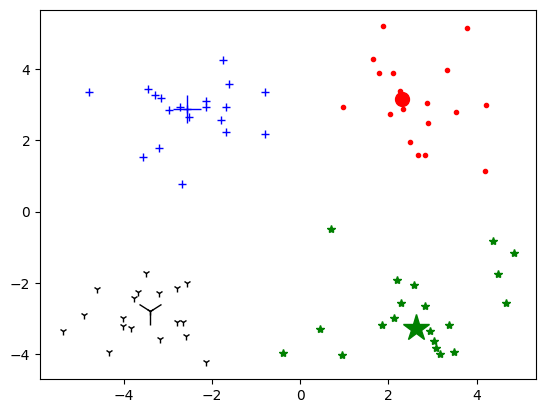

In [84]:
print("K中心点算法聚类:")  
dataSetKMed = []  
fileIn = open('ch11 testSet.txt')  
for line in fileIn.readlines():  
    lineArr = line.strip().split(' ')  
    dataSetKMed.append([float(lineArr[0]), float(lineArr[1])])  
dataSetKMedSize = len(dataSetKMed)
dataSetKMed = np.mat(dataSetKMed)
#K取值4，调用K中心点算法聚类
k = 4
centroids, clusterAssment = kmedoids(dataSetKMed,k) 
showCluster(dataSetKMed, k, centroids, clusterAssment)

In [85]:
X_origin = pd.read_csv('ch11_Mall_Customers.csv',encoding='gb2312')
print('原始数据头5行：')
print(X_origin.shape)
print(X_origin.head())

X = X_origin.drop(['ID','性别'],axis=1)

原始数据头5行：
(200, 5)
   ID      性别  年龄  年收入(万元)  消费评分(1-100)
0   1    Male  19       15           39
1   2    Male  21       15           81
2   3  Female  20       16            6
3   4  Female  23       16           77
4   5  Female  31       17           40


In [86]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
X_scaled_frame = pd.DataFrame(X_scaled,columns=['atr1','atr2','atr3'])
print('规格化转换后数据：')
print(X_scaled_frame.head())

规格化转换后数据：
       atr1      atr2      atr3
0 -1.424569 -1.738999 -0.434801
1 -1.281035 -1.738999  1.195704
2 -1.352802 -1.700830 -1.715913
3 -1.137502 -1.700830  1.040418
4 -0.563369 -1.662660 -0.395980


绘制3维图：


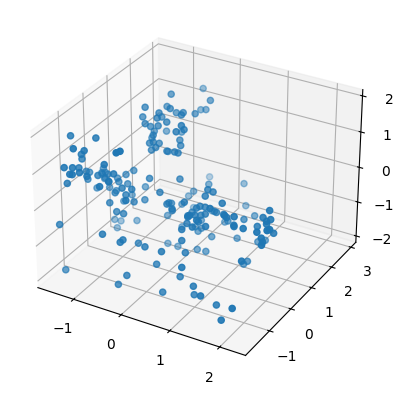

In [87]:
from mpl_toolkits.mplot3d import Axes3D

print('绘制3维图：')
#创建一个三维的绘图工程
fig_3d=plt.figure()
ax3d=fig_3d.add_subplot(111,projection='3d') 
ax3d.scatter(X_scaled_frame['atr1'],X_scaled_frame['atr2'],X_scaled_frame['atr3']) 
fig_3d.savefig('ch12case_01.png', dpi=300, bbox_inches='tight')

      pca_1     pca_2
0 -0.615720 -1.763481
1 -1.665793 -1.820747
2  0.337862 -1.674799
3 -1.456573 -1.772430
4 -0.038465 -1.662740
绘制2维图：


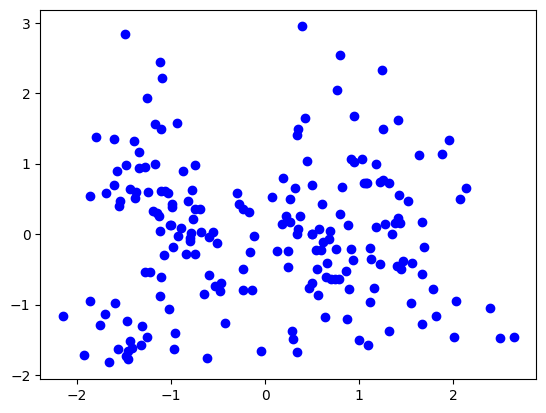

In [88]:
#数据降为2维
#在sklearn中提供了PCA函数，可以将高维数据降为低维
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_pca_frame = pd.DataFrame(X_pca,columns=['pca_1','pca_2'])
print(X_pca_frame.head())
print('绘制2维图：')
fig_2d=plt.figure()
#创建一个二维的绘图工程
ax2d=fig_2d.add_subplot(111) 
ax2d.plot(X_pca_frame['pca_1'],X_pca_frame['pca_2'],'bo') 
fig_2d.savefig('ch12case_02.png', dpi=300, bbox_inches='tight')
fig_2d.show()

K均值聚类：
KMN聚类完成!


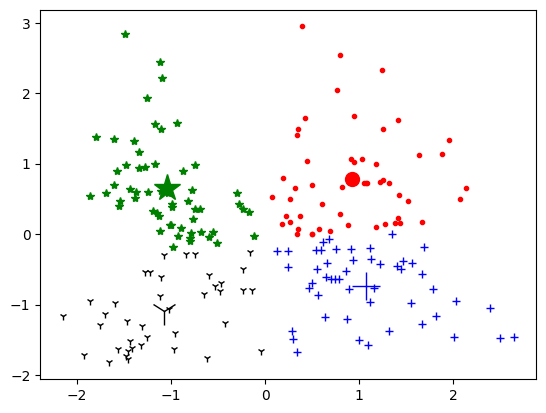

In [89]:
k=4
print("K均值聚类：")
case_cen, case_clusterAssment = kmeans(X_pca, k)
showCluster(X_pca, k, case_cen, case_clusterAssment) 

In [90]:
# Kmeans聚类中心
print('Kmeans聚类中心：')
case_cen.sort(axis=0)
print(case_cen)

Kmeans聚类中心：
[[-1.07064263 -1.09674023]
 [-1.04671072 -0.73117843]
 [ 0.92174118  0.65699063]
 [ 1.07224004  0.77785535]]


K中心点聚类：


KMed聚类完成!


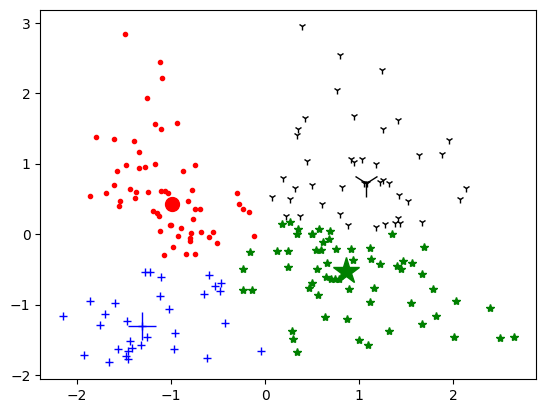

In [91]:
print("K中心点聚类：")
case_cen, case_clusterAssment = kmedoids(X_pca, k)
showCluster(X_pca, k, case_cen, case_clusterAssment) 

In [92]:
#将case_clusterAssment中的聚类结果写回原始DataFrame
X_origin['聚类结果']=case_clusterAssment[:,0]
print('聚类结果：')
print(X_origin.head(15))
#查看按照聚类结果分组的各属性均值
print('聚类结果按年龄统计均值')
g_Age=X_origin['年龄'].groupby(X_origin['聚类结果'])
print(g_Age.mean().sort_values())
print('聚类结果按年收入统计均值')
g_Income=X_origin['年收入(万元)'].groupby(X_origin['聚类结果'])
print(g_Income.mean().sort_values())
print('聚类结果按消费评分统计均值')
g_Rate=X_origin['消费评分(1-100)'].groupby(X_origin['聚类结果'])
print(g_Rate.mean().sort_values())

聚类结果：
    ID      性别  年龄  年收入(万元)  消费评分(1-100)  聚类结果
0    1    Male  19       15           39   1.0
1    2    Male  21       15           81   1.0
2    3  Female  20       16            6   2.0
3    4  Female  23       16           77   1.0
4    5  Female  31       17           40   1.0
5    6  Female  22       17           76   1.0
6    7  Female  35       18            6   2.0
7    8  Female  23       18           94   1.0
8    9    Male  64       19            3   2.0
9   10  Female  30       19           72   1.0
10  11    Male  67       19           14   2.0
11  12  Female  35       19           99   1.0
12  13  Female  58       20           15   2.0
13  14  Female  24       20           77   1.0
14  15    Male  37       20           13   2.0
聚类结果按年龄统计均值
聚类结果
1.0    25.343750
0.0    29.672131
3.0    45.488889
2.0    50.032258
Name: 年龄, dtype: float64
聚类结果按年收入统计均值
聚类结果
1.0    29.687500
2.0    43.258065
0.0    77.852459
3.0    82.911111
Name: 年收入(万元), dtype: float64
聚类结果按消费评分统计均值
聚类